In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
from pandas import DataFrame, Series

In [5]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [6]:
c_cycle=("#3498db","#e74c3c","#1abc9c","#9b59b6","#f1c40f","#ecf0f1","#34495e",
                  "#446cb3","#d24d57","#27ae60","#663399", "#f7ca18","#bdc3c7","#2c3e50")
mpl.rc('font', family='Bitstream Vera Sans', size=20)
mpl.rc('lines', linewidth=2,color="#2c3e50")
mpl.rc('patch', linewidth=0,facecolor="none",edgecolor="none")
mpl.rc('text', color='#2c3e50')
mpl.rc('axes', facecolor='none',edgecolor="none",titlesize=25,labelsize=15,color_cycle=c_cycle,grid=False)
mpl.rc('xtick.major',size=10,width=0)
mpl.rc('ytick.major',size=10,width=0)
mpl.rc('xtick.minor',size=10,width=0)
mpl.rc('ytick.minor',size=10,width=0)
mpl.rc('ytick',direction="out")
mpl.rc('grid',color='#c0392b',alpha=0.3,linewidth=1)
mpl.rc('legend',numpoints=3,fontsize=15,borderpad=0,markerscale=3,labelspacing=0.2,frameon=False,framealpha=0.6,handlelength=1,handleheight=0.5)
mpl.rc('figure',figsize=(10,6),dpi=80,facecolor="none",edgecolor="none")
mpl.rc('savefig',dpi=100,facecolor="none",edgecolor="none")

Changed design

###1.Plot the daily temperature over the course of the year. (This should probably be a line chart.) Create a bar chart that shows the average temperature and humidity by month.¶

In [7]:
weather = pd.read_table("daily_weather.tsv")

In [8]:
usage = pd.read_table("usage_2012.tsv")

In [9]:
station = pd.read_table("stations.tsv")

In [10]:
weather.loc[weather['season_code'] == 1, 'season_desc'] = 'winter'

In [11]:
weather.loc[weather['season_code'] == 2, 'season_desc'] = 'spring'

In [12]:
weather.loc[weather['season_code'] == 3, 'season_desc'] = 'summer'

In [13]:
weather.loc[weather['season_code'] == 4, 'season_desc'] = 'fall'

In [14]:
weather['date'] = pd.to_datetime(weather['date'])

In [15]:
month_rental = weather.groupby(weather['date'].dt.month)['total_riders'].sum()

In [16]:
mean = weather.groupby('season_desc')['temp'].mean()

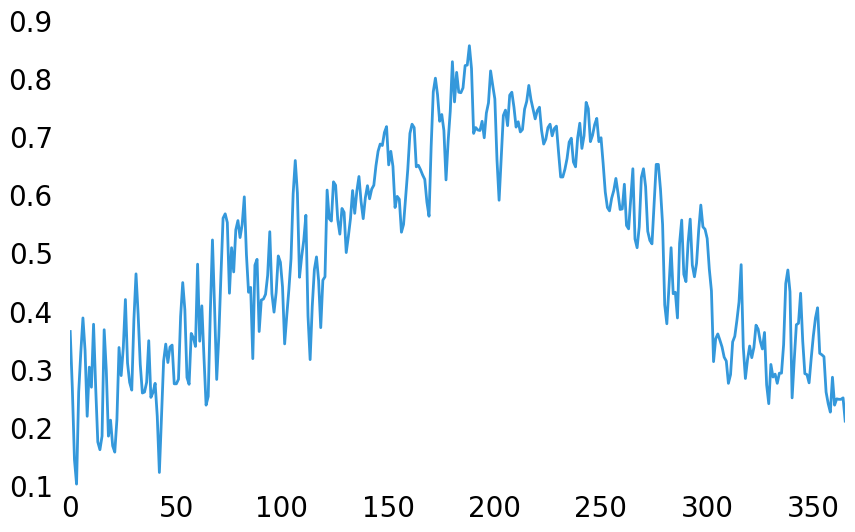

In [17]:
weather['temp'].plot()

In [18]:
weather['month'] = pd.DatetimeIndex(weather.date).month

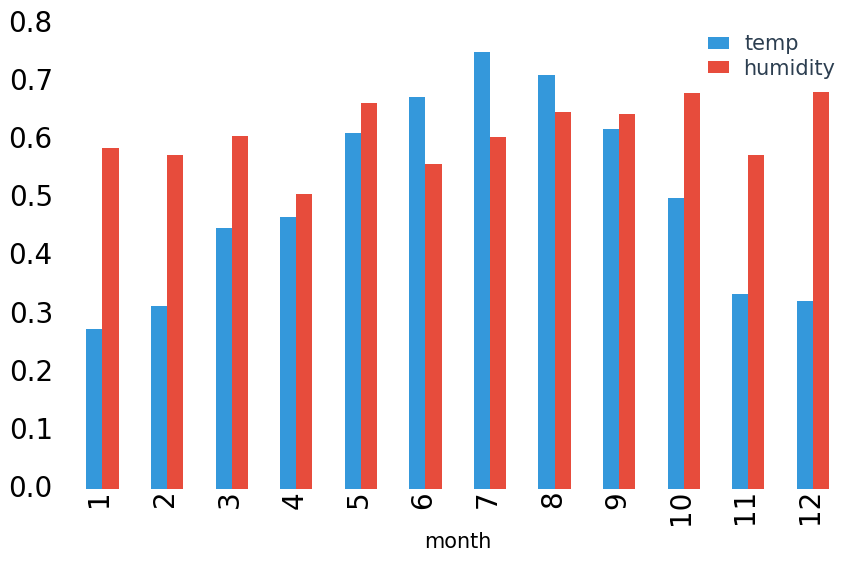

In [19]:
weather.groupby('month')['temp', 'humidity'].mean().plot(kind='bar')

###2.Use a scatterplot to show how the daily rental volume varies with temperature. Use a different series (with different colors) for each season.

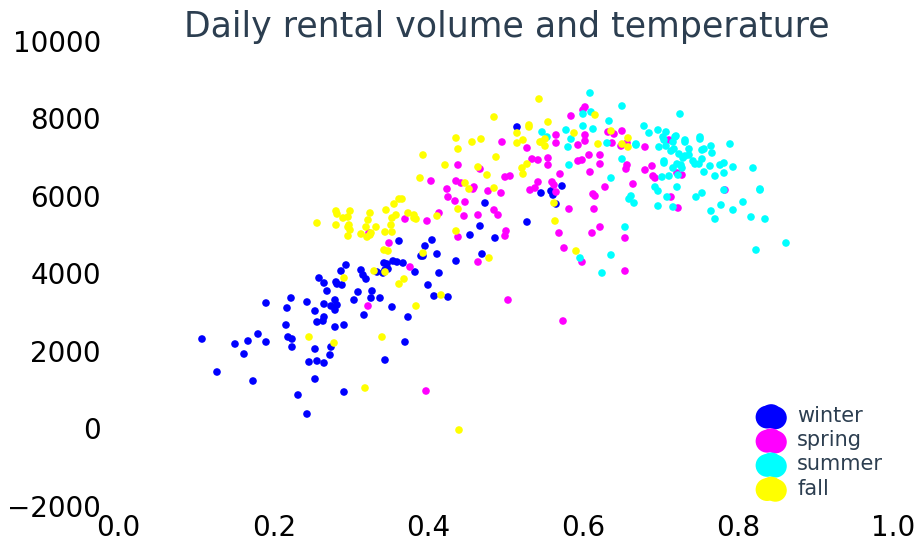

In [20]:
plt.scatter(
    weather[weather['season_desc'] == 'winter']['temp'],
    weather[weather['season_desc'] == 'winter']['total_riders'],
    s=30, color='blue', label='winter')
plt.scatter(
    weather[weather['season_desc'] == 'spring']['temp'],
    weather[weather['season_desc'] == 'spring']['total_riders'],
    s=30, color='magenta', label='spring')
plt.scatter(
    weather[weather['season_desc'] == 'summer']['temp'],
    weather[weather['season_desc'] == 'summer']['total_riders'],
    s=30, color='cyan', label='summer')
plt.scatter(
    weather[weather['season_desc'] == 'fall']['temp'],
    weather[weather['season_desc'] == 'fall']['total_riders'],
    s=30, color='yellow', label='fall')
plt.title("Daily rental volume and temperature")
plt.legend(loc=4)
plt.show()

###3.Create another scatterplot to show how daily rental volume varies with windspeed. As above, use a different series for each season.

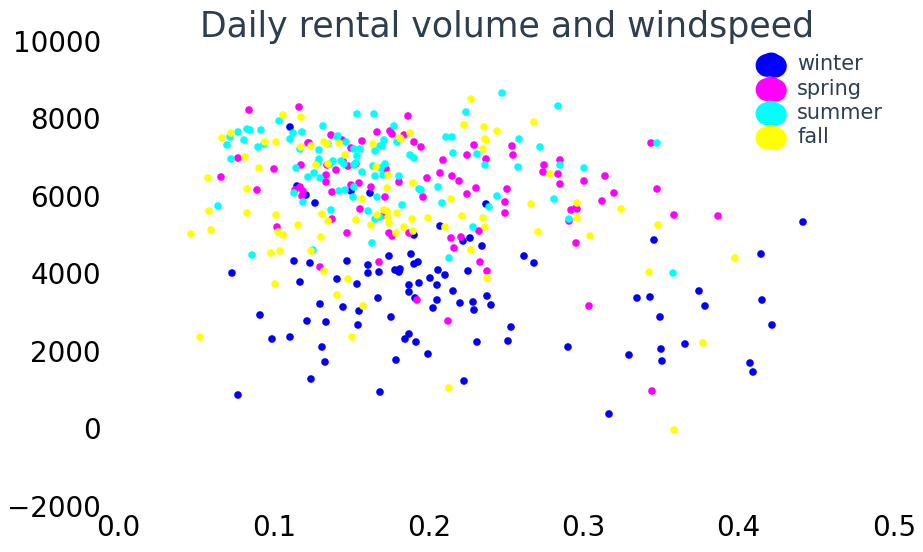

In [21]:
plt.scatter(
    weather[weather['season_desc'] == 'winter']['windspeed'],
    weather[weather['season_desc'] == 'winter']['total_riders'],
    s=30, color='blue', label='winter')
plt.scatter(
    weather[weather['season_desc'] == 'spring']['windspeed'],
    weather[weather['season_desc'] == 'spring']['total_riders'],
    s=30, color='magenta', label='spring')
plt.scatter(
    weather[weather['season_desc'] == 'summer']['windspeed'],
    weather[weather['season_desc'] == 'summer']['total_riders'],
    s=30, color='cyan', label='summer')
plt.scatter(
    weather[weather['season_desc'] == 'fall']['windspeed'],
    weather[weather['season_desc'] == 'fall']['total_riders'],
    s=30, color='yellow', label='fall')
plt.title("Daily rental volume and windspeed")
plt.legend(loc=1)
plt.show()

###4.How do the rental volumes vary with geography? Compute the average daily rentals for each station and use this as the radius for a scatterplot of each station's latitude and longitude.

In [22]:
stations = station [['station', 'lat', 'long']]

In [23]:
stations

,station,lat,long
0,20th & Bell St,38.856100,-77.051200
1,18th & Eads St.,38.857250,-77.053320
2,20th & Crystal Dr,38.856400,-77.049200
3,15th & Crystal Dr,38.860170,-77.049593
4,Aurora Hills Community Ctr/18th & Hayes St,38.857866,-77.059490
5,Pentagon City Metro / 12th & S Hayes St,38.862303,-77.059936
6,S Joyce & Army Navy Dr,38.863700,-77.063300
7,Crystal City Metro / 18th & Bell St,38.857300,-77.051100
8,12th & Army Navy Dr,38.862900,-77.052800
9,27th & Crystal Dr,38.848441,-77.051516


In [24]:
count = usage['station_start'].value_counts()

In [25]:
average_rental_df = DataFrame({ 'average_rental' : count / 365})

In [26]:
average_rental_df.index = range(185)

In [27]:
average_rental_df

,average_rental
0,191.369863
1,151.084932
2,135.386301
3,119.306849
4,110.252055
5,110.087671
6,109.865753
7,108.884932
8,95.531507
9,91.000000


In [28]:
merged_df = pd.concat([stations, average_rental_df], axis=1)

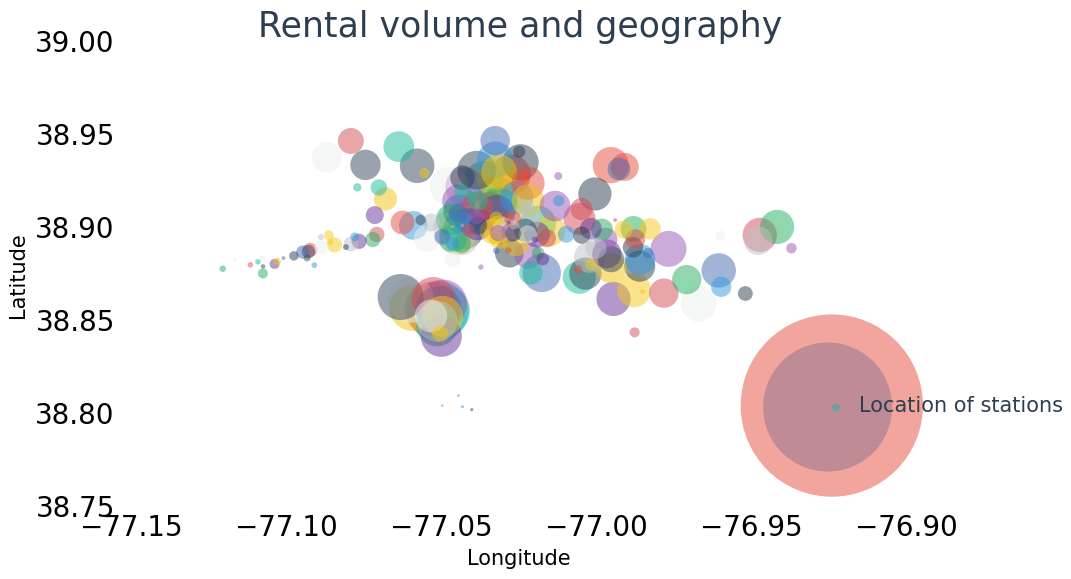

In [29]:
plt.scatter(merged_df['long'], merged_df['lat'], color=c_cycle, alpha=0.5, s=(merged_df['average_rental']*10), label='Location of stations', )
plt.legend(bbox_to_anchor=(1.2, 0.2), loc='lower right', borderaxespad=0)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Rental volume and geography')
plt.show()